## Run in cloab or not?

In [4]:
try: #If running in colab 
    import google.colab
    IN_COLAB = True 
    %tensorflow_version 2.x
except:
    IN_COLAB = False

## Check tensorflow version 

In [5]:
import tensorflow as tf
#if (not tf.__version__.startswith('2')): #Checking if tf 2.0 is installed
#print('Please install tensorflow 2.0 to run this notebook')
#print('Tensorflow version: ',tf.__version__, ' running in colab?: ', IN_COLAB)


## All Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.metrics import confusion_matrix

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation, Dropout
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import optimizers

In [7]:
def printHistory(hr):
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,(1))
  plt.plot(hr.history['accuracy'],linestyle='-.')
  plt.plot(hr.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='lower right')
  plt.subplot(1,2,(2))
  plt.plot(hr.history['loss'],linestyle='-.')
  plt.plot(hr.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='upper right')

## Load MNIST Dataset

In [8]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

X_train = x_train[0:50000] / 255
Y_train = keras.utils.to_categorical(y_train[0:50000],10)

X_val = x_train[50000:60000] / 255
Y_val = keras.utils.to_categorical(y_train[50000:60000],10)

X_test = x_test / 255
Y_test = keras.utils.to_categorical(y_test,10)

del x_train, y_train, x_test, y_test

X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_val= X_val.reshape(X_val.shape[0],28,28,1)
X_test= X_test.reshape(X_test.shape[0],28,28,1)


11501568/11490434 [==============================] - 26s 2us/step


## Check Data Shape

In [9]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(50000, 10)
(10000, 10)
(10000, 10)


## Visualize some images

<ipython-input-10-c9405a6d000e>:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.title('true label: ' + np.str(np.argmax(Y_train,axis=1)[i]))


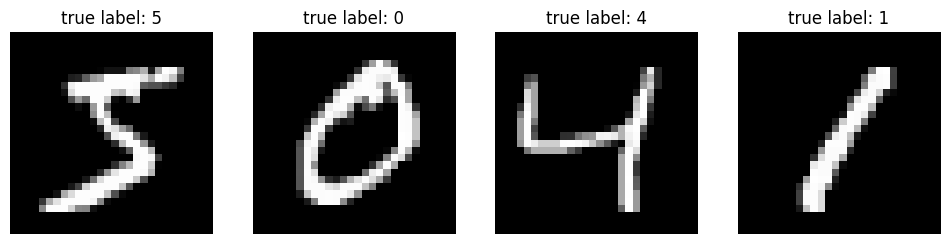

In [10]:

plt.figure(figsize=(12,12))
for i in range(0,4):
  plt.subplot(1,4,(i+1))
  plt.imshow((X_train[i,:,:,0]),cmap='gray')
  plt.title('true label: ' + np.str(np.argmax(Y_train,axis=1)[i]))
  plt.axis('off')

## Flatten the vectors

In [11]:
X_train_flat = X_train.reshape([X_train.shape[0],784])
X_val_flat =X_val.reshape([X_val.shape[0],784])
X_test_flat = X_test.reshape([X_test.shape[0],784])

print(X_train_flat.shape)
print(Y_train.shape)
print(X_val_flat.shape)
print(Y_val.shape)

(50000, 784)
(50000, 10)
(10000, 784)
(10000, 10)


## Set up fcNN

In [25]:
model = Sequential()

model.add(Dense(100,batch_input_shape=(None,784),activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


## Train the Model

In [27]:
history = model.fit(X_train_flat,Y_train,
                    batch_size=128,
                    epochs=15,
                    verbose=2,
                    validation_data=(X_val_flat,Y_val))

Epoch 1/15
391/391 - 2s - loss: 0.6344 - accuracy: 0.8070 - val_loss: 0.1960 - val_accuracy: 0.9494 - 2s/epoch - 6ms/step
Epoch 2/15
391/391 - 2s - loss: 0.2849 - accuracy: 0.9208 - val_loss: 0.1525 - val_accuracy: 0.9572 - 2s/epoch - 4ms/step
Epoch 3/15
391/391 - 3s - loss: 0.2153 - accuracy: 0.9388 - val_loss: 0.1209 - val_accuracy: 0.9649 - 3s/epoch - 7ms/step
Epoch 4/15
391/391 - 3s - loss: 0.1769 - accuracy: 0.9500 - val_loss: 0.1121 - val_accuracy: 0.9667 - 3s/epoch - 7ms/step
Epoch 5/15
391/391 - 3s - loss: 0.1526 - accuracy: 0.9574 - val_loss: 0.1024 - val_accuracy: 0.9690 - 3s/epoch - 7ms/step
Epoch 6/15
391/391 - 2s - loss: 0.1320 - accuracy: 0.9621 - val_loss: 0.0945 - val_accuracy: 0.9728 - 2s/epoch - 6ms/step
Epoch 7/15
391/391 - 3s - loss: 0.1183 - accuracy: 0.9669 - val_loss: 0.0921 - val_accuracy: 0.9732 - 3s/epoch - 7ms/step
Epoch 8/15
391/391 - 3s - loss: 0.1049 - accuracy: 0.9695 - val_loss: 0.0852 - val_accuracy: 0.9736 - 3s/epoch - 7ms/step
Epoch 9/15
391/391 - 2s 

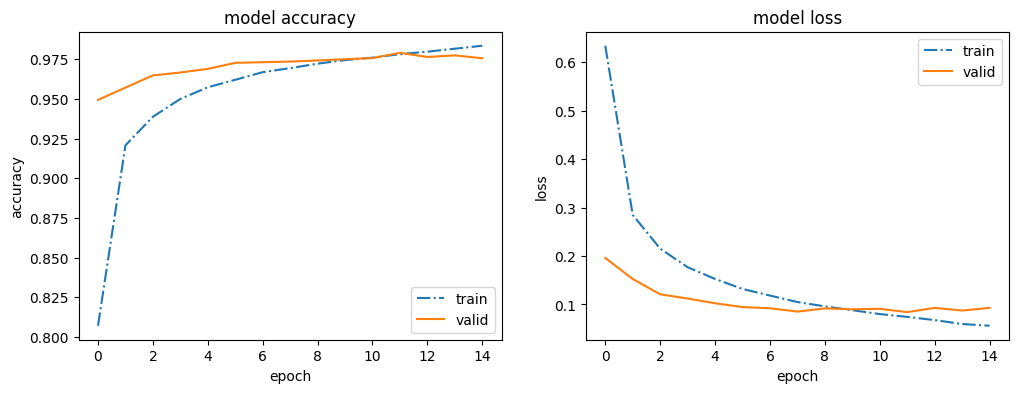

In [28]:
printHistory(history)

## Make predictions

In [16]:
pred = model.predict(X_test_flat)
print(confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(pred,axis=1)))
acc_fc_orig = np.sum(np.argmax(Y_test,axis=1)== np.argmax(pred,axis=1)) / len(pred)
print("Acc_fc_orig_flat = " , acc_fc_orig)

[[ 970    1    0    1    2    1    2    1    2    0]
 [   0 1121    2    1    0    1    6    2    1    1]
 [   7    1 1003    6    3    0    1    5    6    0]
 [   0    1    4  990    0    7    0    2    2    4]
 [   1    0    1    1  966    0    4    1    2    6]
 [   3    0    0   13    1  862    5    1    4    3]
 [   2    2    0    1    7    3  941    0    2    0]
 [   0    4    9    1    0    0    0 1003    1   10]
 [   6    0    4   10    5    2    3    3  937    4]
 [   2    3    0    5   19    0    0    4    0  976]]
Acc_fc_orig_flat =  0.9769


## Aufgabe: 
Try to improve the fcNN by adding more hidden layers and/or changing the activation function from "sigmoid" to "relu". What do you observe? can you improve the performace on the testset?

* Relu-Activation: Der Trainings-Loss wird geringer, jedoch wird der validation-Loss höher (Overfitting)

* Dropout: Mit einem Dropout wird das Overfitting vermieden, validation-loss ist geringer

* Weiterer Layer: Mit einem weiteren Layer wird wieder mehr Overfitting erzeugt

## Create a CNN

In [17]:
model2 = Sequential()

input_shape = (28,28,1)

model2.add(Convolution2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Convolution2D(64,kernel_size=(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dropout(0.5))
model2.add(Dense(10,activation='softmax'))


model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model2.build()

In [18]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

## Train CNN

In [19]:
history2 = model2.fit(X_train,Y_train,
                     batch_size=128,
                     epochs=10,
                     verbose=1,
                     validation_data=(X_val,Y_val))

Epoch 1/10
391/391 [==============================] - 22s 56ms/step - loss: 0.3834 - accuracy: 0.8834 - val_loss: 0.1012 - val_accuracy: 0.9703
Epoch 2/10
391/391 [==============================] - 23s 59ms/step - loss: 0.1178 - accuracy: 0.9641 - val_loss: 0.0682 - val_accuracy: 0.9823
Epoch 3/10
391/391 [==============================] - 23s 60ms/step - loss: 0.0894 - accuracy: 0.9732 - val_loss: 0.0600 - val_accuracy: 0.9841
Epoch 4/10
391/391 [==============================] - 24s 60ms/step - loss: 0.0747 - accuracy: 0.9776 - val_loss: 0.0499 - val_accuracy: 0.9863
Epoch 5/10
391/391 [==============================] - 24s 61ms/step - loss: 0.0648 - accuracy: 0.9803 - val_loss: 0.0437 - val_accuracy: 0.9881
Epoch 6/10
391/391 [==============================] - 25s 63ms/step - loss: 0.0575 - accuracy: 0.9821 - val_loss: 0.0418 - val_accuracy: 0.9874
Epoch 7/10
391/391 [==============================] - 25s 63ms/step - loss: 0.0526 - accuracy: 0.9836 - val_loss: 0.0420 - val_accuracy:

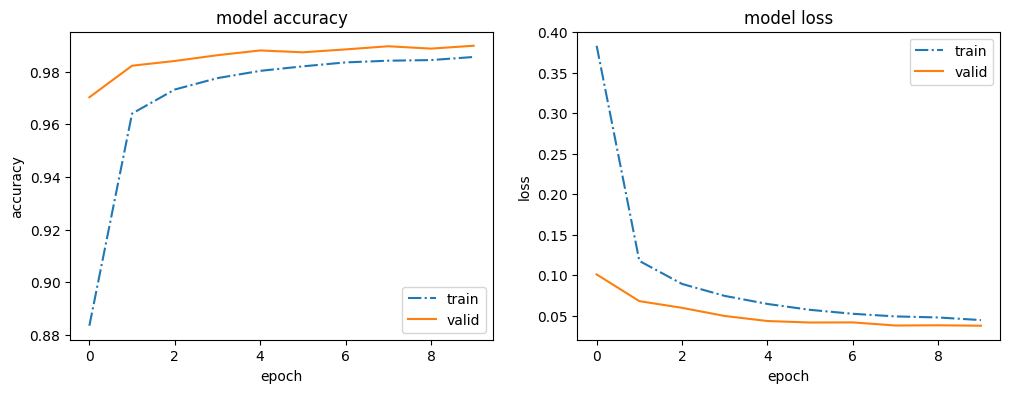

In [20]:
printHistory(history2)

In [21]:
pred = model2.predict(X_test)
print(confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(pred,axis=1)))
acc_fc_orig = np.sum(np.argmax(Y_test,axis=1)== np.argmax(pred,axis=1)) / len(pred)
print("Acc_fc_orig_flat = " , acc_fc_orig)

[[ 977    0    1    0    0    0    0    1    1    0]
 [   0 1131    2    0    0    0    1    1    0    0]
 [   1    1 1021    0    2    0    1    6    0    0]
 [   0    0    2  998    0    5    0    3    2    0]
 [   0    0    0    0  972    0    1    2    1    6]
 [   2    0    1    4    0  882    1    1    1    0]
 [   5    2    1    0    1    4  945    0    0    0]
 [   0    1    6    2    0    0    0 1016    1    2]
 [   3    0    2    0    1    1    1    4  959    3]
 [   2    3    2    0    2    3    0    5    2  990]]
Acc_fc_orig_flat =  0.9891


## Visualize Features of different Layers

In [22]:
layer_outputs = [layer.output for layer in model2.layers]

In [24]:
feature_map_model = tf.keras.models.Model(input=model.input, output=layer_outputs)

TypeError: ('Keyword argument not understood:', 'input')